In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 경로 설정 
import os
os.chdir('/content/drive/MyDrive/A2W/데이터/data_submission')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier

# **데이터 불러오기**

In [5]:
merge_final_real = pd.read_csv("merge_final_real1.csv", encoding='utf-8-sig')
merge_final_real

,tm,stnId,umd2,avgTa,minTa,maxTa,mi10MaxRn,hr1MaxRn,sumRnDur,sumRn,maxInsWs,maxWs,avgWs,minRhm,avgRhm,n99Rn,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,HEIGHT,landslide,1day_yn,2day_yn
0,2011-01-01,115,울릉군 울릉읍,0.8,-1.1,2.1,0.0,0.0,19.33,28.0,29.4,19.0,11.1,65.0,82.5,5.8,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,0.0
1,2011-01-02,115,울릉군 울릉읍,0.1,-0.9,1.3,0.0,0.0,22.83,24.8,14.5,8.5,6.0,65.0,91.5,29.7,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,0.0
2,2011-01-03,115,울릉군 울릉읍,-0.3,-1.4,0.8,0.0,0.0,12.83,7.5,15.9,10.2,6.5,61.0,80.3,0.3,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,0.0
3,2011-01-04,115,울릉군 울릉읍,1.7,0.4,3.9,0.0,0.0,0.00,0.0,11.2,6.8,3.1,53.0,63.1,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,0.0
4,2011-01-05,115,울릉군 울릉읍,1.2,-1.2,2.6,0.0,0.0,7.25,1.8,13.9,6.9,4.1,42.0,61.5,12.3,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093785,2019-12-27,295,남해군 창선면,3.3,-1.9,7.4,0.0,0.0,0.00,0.0,5.8,3.4,1.8,30.0,50.0,0.0,1,11,204.6,31.4,322.5,4,7,1,1,20,2,1,1.0,2.0,1.0,15.0,2.0,4.0,12.0,0.0,0.0,0.0
2093786,2019-12-28,295,남해군 창선면,2.2,-1.9,8.1,0.0,0.0,0.00,0.0,2.7,1.6,0.9,33.0,56.1,0.0,1,11,204.6,31.4,322.5,4,7,1,1,20,2,1,1.0,2.0,1.0,15.0,2.0,4.0,12.0,0.0,0.0,0.0
2093787,2019-12-29,295,남해군 창선면,3.2,-0.5,5.8,0.0,0.0,0.00,8.5,2.6,1.4,0.8,53.0,75.8,0.0,1,11,204.6,31.4,322.5,4,7,1,1,20,2,1,1.0,2.0,1.0,15.0,2.0,4.0,12.0,0.0,0.0,0.0
2093788,2019-12-30,295,남해군 창선면,6.8,3.6,12.6,0.0,0.0,0.00,0.5,6.1,3.4,1.2,50.0,78.9,0.0,1,11,204.6,31.4,322.5,4,7,1,1,20,2,1,1.0,2.0,1.0,15.0,2.0,4.0,12.0,0.0,0.0,0.0


# 출력 데이터 만드는 코드

In [ ]:
# 1day_yn / 2day_yn 추가
merge_final_real['1day_yn'] = 0.0
merge_final_real['2day_yn'] = 0.0
merge_final_real['1day_yn'][1:-1] = merge_final_real['landslide'][0:-2]
merge_final_real['2day_yn'][2:-1] = merge_final_real['landslide'][0:-3]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
merge_final_real

,tm,stnId,umd2,avgTa,minTa,maxTa,mi10MaxRn,hr1MaxRn,sumRnDur,sumRn,maxInsWs,maxWs,avgWs,minRhm,avgRhm,n99Rn,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,HEIGHT,landslide,1day_yn,2day_yn
0,2011-01-01,115,울릉군 울릉읍,0.8,-1.1,2.1,0.0,0.0,19.33,28.0,29.4,19.0,11.1,65.0,82.5,5.8,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,0.0
1,2011-01-02,115,울릉군 울릉읍,0.1,-0.9,1.3,0.0,0.0,22.83,24.8,14.5,8.5,6.0,65.0,91.5,29.7,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,0.0
2,2011-01-03,115,울릉군 울릉읍,-0.3,-1.4,0.8,0.0,0.0,12.83,7.5,15.9,10.2,6.5,61.0,80.3,0.3,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,0.0
3,2011-01-04,115,울릉군 울릉읍,1.7,0.4,3.9,0.0,0.0,0.00,0.0,11.2,6.8,3.1,53.0,63.1,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,0.0
4,2011-01-05,115,울릉군 울릉읍,1.2,-1.2,2.6,0.0,0.0,7.25,1.8,13.9,6.9,4.1,42.0,61.5,12.3,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093785,2019-12-27,295,남해군 창선면,3.3,-1.9,7.4,0.0,0.0,0.00,0.0,5.8,3.4,1.8,30.0,50.0,0.0,1,11,204.6,31.4,322.5,4,7,1,1,20,2,1,1.0,2.0,1.0,15.0,2.0,4.0,12.0,0.0,0.0,0.0
2093786,2019-12-28,295,남해군 창선면,2.2,-1.9,8.1,0.0,0.0,0.00,0.0,2.7,1.6,0.9,33.0,56.1,0.0,1,11,204.6,31.4,322.5,4,7,1,1,20,2,1,1.0,2.0,1.0,15.0,2.0,4.0,12.0,0.0,0.0,0.0
2093787,2019-12-29,295,남해군 창선면,3.2,-0.5,5.8,0.0,0.0,0.00,8.5,2.6,1.4,0.8,53.0,75.8,0.0,1,11,204.6,31.4,322.5,4,7,1,1,20,2,1,1.0,2.0,1.0,15.0,2.0,4.0,12.0,0.0,0.0,0.0
2093788,2019-12-30,295,남해군 창선면,6.8,3.6,12.6,0.0,0.0,0.00,0.5,6.1,3.4,1.2,50.0,78.9,0.0,1,11,204.6,31.4,322.5,4,7,1,1,20,2,1,1.0,2.0,1.0,15.0,2.0,4.0,12.0,0.0,0.0,0.0


In [4]:
merge_final_real.to_csv("merge_final_real1.csv", index=False, encoding='utf-8-sig')

NameError: ignored

In [ ]:
merge_final_real1 = pd.read_csv("merge_final_real1.csv", encoding='utf-8-sig')
merge_final_real1

,tm,stnId,umd2,avgTa,minTa,maxTa,mi10MaxRn,hr1MaxRn,sumRnDur,sumRn,maxInsWs,maxWs,avgWs,minRhm,avgRhm,n99Rn,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,HEIGHT,landslide,1day_yn,2day_yn
0,2011-01-01,115,울릉군 울릉읍,0.8,-1.1,2.1,0.0,0.0,19.33,28.0,29.4,19.0,11.1,65.0,82.5,5.8,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,0.0
1,2011-01-02,115,울릉군 울릉읍,0.1,-0.9,1.3,0.0,0.0,22.83,24.8,14.5,8.5,6.0,65.0,91.5,29.7,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,0.0
2,2011-01-03,115,울릉군 울릉읍,-0.3,-1.4,0.8,0.0,0.0,12.83,7.5,15.9,10.2,6.5,61.0,80.3,0.3,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,0.0
3,2011-01-04,115,울릉군 울릉읍,1.7,0.4,3.9,0.0,0.0,0.00,0.0,11.2,6.8,3.1,53.0,63.1,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,0.0
4,2011-01-05,115,울릉군 울릉읍,1.2,-1.2,2.6,0.0,0.0,7.25,1.8,13.9,6.9,4.1,42.0,61.5,12.3,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093785,2019-12-27,295,남해군 창선면,3.3,-1.9,7.4,0.0,0.0,0.00,0.0,5.8,3.4,1.8,30.0,50.0,0.0,1,11,204.6,31.4,322.5,4,7,1,1,20,2,1,1.0,2.0,1.0,15.0,2.0,4.0,12.0,0.0,0.0,0.0
2093786,2019-12-28,295,남해군 창선면,2.2,-1.9,8.1,0.0,0.0,0.00,0.0,2.7,1.6,0.9,33.0,56.1,0.0,1,11,204.6,31.4,322.5,4,7,1,1,20,2,1,1.0,2.0,1.0,15.0,2.0,4.0,12.0,0.0,0.0,0.0
2093787,2019-12-29,295,남해군 창선면,3.2,-0.5,5.8,0.0,0.0,0.00,8.5,2.6,1.4,0.8,53.0,75.8,0.0,1,11,204.6,31.4,322.5,4,7,1,1,20,2,1,1.0,2.0,1.0,15.0,2.0,4.0,12.0,0.0,0.0,0.0
2093788,2019-12-30,295,남해군 창선면,6.8,3.6,12.6,0.0,0.0,0.00,0.5,6.1,3.4,1.2,50.0,78.9,0.0,1,11,204.6,31.4,322.5,4,7,1,1,20,2,1,1.0,2.0,1.0,15.0,2.0,4.0,12.0,0.0,0.0,0.0


In [ ]:
merge_final_real_test = merge_final_real[merge_final_real['umd2'] == "합천군 가회면"]
merge_final_real_test

,tm,stnId,umd2,avgTa,minTa,maxTa,mi10MaxRn,hr1MaxRn,sumRnDur,sumRn,maxInsWs,maxWs,avgWs,minRhm,avgRhm,n99Rn,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,HEIGHT,landslide,1day_yn,2day_yn
1827561,2011-01-01,285,합천군 가회면,-2.1,-8.4,4.4,0.0,0.0,0.0,0.0,9.3,6.0,1.8,25.0,48.9,0.0,1,11,442.8,11.4,107.1,2,12,5,2,30,2,2,1.0,1.0,3.0,77.0,0.0,1.0,0.0,0.0,0.0,0.0
1827562,2011-01-02,285,합천군 가회면,-2.3,-8.8,7.0,0.0,0.0,0.0,0.0,6.4,4.9,1.0,31.0,67.0,0.0,1,11,442.8,11.4,107.1,2,12,5,2,30,2,2,1.0,1.0,3.0,77.0,0.0,1.0,0.0,0.0,0.0,0.0
1827563,2011-01-03,285,합천군 가회면,-2.8,-10.1,3.5,0.0,0.0,0.0,0.4,5.7,3.7,0.8,36.0,77.8,0.0,1,11,442.8,11.4,107.1,2,12,5,2,30,2,2,1.0,1.0,3.0,77.0,0.0,1.0,0.0,0.0,0.0,0.0
1827564,2011-01-04,285,합천군 가회면,-1.6,-6.3,5.8,0.0,0.0,0.0,0.5,5.8,2.8,1.0,35.0,73.9,0.0,1,11,442.8,11.4,107.1,2,12,5,2,30,2,2,1.0,1.0,3.0,77.0,0.0,1.0,0.0,0.0,0.0,0.0
1827565,2011-01-05,285,합천군 가회면,-0.8,-6.9,5.2,0.0,0.0,0.0,0.0,8.3,4.5,1.4,33.0,60.3,0.0,1,11,442.8,11.4,107.1,2,12,5,2,30,2,2,1.0,1.0,3.0,77.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1830843,2019-12-27,285,합천군 가회면,1.8,-3.8,8.0,0.0,0.0,0.0,0.0,7.1,3.3,1.4,19.0,51.0,0.0,1,11,442.8,11.4,107.1,2,12,5,2,30,2,2,1.0,1.0,3.0,77.0,0.0,1.0,0.0,0.0,0.0,0.0
1830844,2019-12-28,285,합천군 가회면,-1.0,-6.9,7.7,0.0,0.0,0.0,0.0,3.5,1.5,0.6,35.0,73.0,0.0,1,11,442.8,11.4,107.1,2,12,5,2,30,2,2,1.0,1.0,3.0,77.0,0.0,1.0,0.0,0.0,0.0,0.0
1830845,2019-12-29,285,합천군 가회면,0.8,-4.7,6.6,0.0,0.0,0.0,5.4,2.5,1.4,0.5,44.0,84.5,0.0,1,11,442.8,11.4,107.1,2,12,5,2,30,2,2,1.0,1.0,3.0,77.0,0.0,1.0,0.0,0.0,0.0,0.0
1830846,2019-12-30,285,합천군 가회면,5.7,2.2,9.8,0.0,0.0,0.0,0.0,8.0,4.0,0.9,41.0,83.9,0.0,1,11,442.8,11.4,107.1,2,12,5,2,30,2,2,1.0,1.0,3.0,77.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
merge_final_real_test

# 데이터 시각화

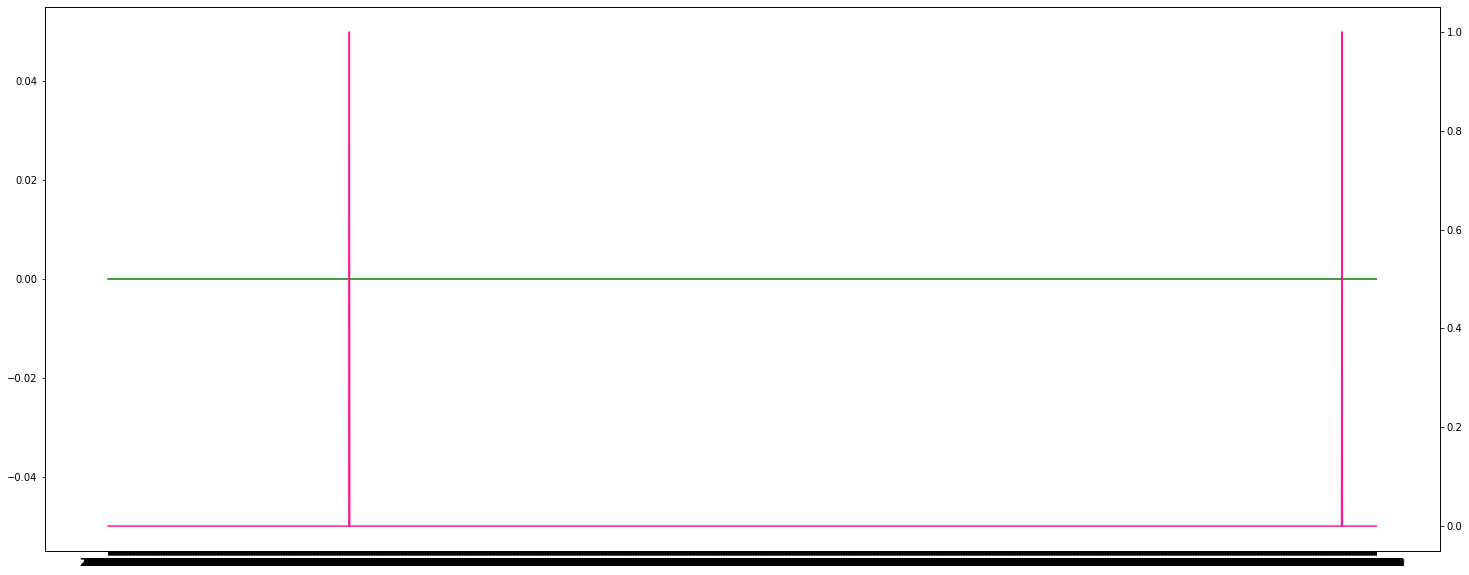

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# plt.figure(figsize=(20,8))
# plt.plot(merge_final_real_test["tm"], merge_final_real_test["n99Rn"], merge_final_real_test["tm"], merge_final_real_test["landslide"])
# plt.bar(merge_final_real_test["tm"], merge_final_real_test["landslide"], width=0.6, align='edge', color="springgreen",
#         edgecolor="gray", linewidth=3)

x = merge_final_real_test["tm"]
y1 = merge_final_real_test["n99Rn"]
y2 = merge_final_real_test["landslide"]

plt.rcParams['figure.figsize'] = (25, 10)
fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='green')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='deeppink')

plt.show()

In [ ]:
pd.value_counts(merge_final_real["landslide"])

0.0    2093431
1.0        359
Name: landslide, dtype: int64

In [ ]:
merge_final_real1.isnull().sum()

tm               0
stnId            0
umd2             0
avgTa         1664
minTa          159
maxTa          214
mi10MaxRn        0
hr1MaxRn         0
sumRnDur         0
sumRn            0
maxInsWs       437
maxWs          543
avgWs          911
minRhm        1515
avgRhm        3626
n99Rn            0
PRRCK_LARG       0
PRRCK_MDDL       0
LOCTN_ALTT       0
LOCTN_GRDN       0
EIGHT_AGL        0
CLZN_CD          0
TPGRP_TPCD       0
PRDN_FOM_C       0
SLANT_TYP        0
SLDPT_TPCD       0
SCSTX_CD         0
SLTP_CD          0
STORUNST         0
FROR_CD          0
FRTP_CD          0
KOFTR_GROU       0
DMCLS_CD         0
AGCLS_CD         0
HEIGHT           0
landslide        0
1day_yn          0
2day_yn          0
dtype: int64

#**RF로 1day만 예측**

In [12]:
df_sample = merge_final_real.drop(['umd2', "stnId", "tm"], axis=1)
df_sample

,avgTa,minTa,maxTa,mi10MaxRn,hr1MaxRn,sumRnDur,sumRn,maxInsWs,maxWs,avgWs,minRhm,avgRhm,n99Rn,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,HEIGHT,landslide,1day_yn,2day_yn
0,0.8,-1.1,2.1,0.0,0.0,19.33,28.0,29.4,19.0,11.1,65.0,82.5,5.8,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,0.0
1,0.1,-0.9,1.3,0.0,0.0,22.83,24.8,14.5,8.5,6.0,65.0,91.5,29.7,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,0.0
2,-0.3,-1.4,0.8,0.0,0.0,12.83,7.5,15.9,10.2,6.5,61.0,80.3,0.3,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,0.0
3,1.7,0.4,3.9,0.0,0.0,0.00,0.0,11.2,6.8,3.1,53.0,63.1,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,0.0
4,1.2,-1.2,2.6,0.0,0.0,7.25,1.8,13.9,6.9,4.1,42.0,61.5,12.3,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093785,3.3,-1.9,7.4,0.0,0.0,0.00,0.0,5.8,3.4,1.8,30.0,50.0,0.0,1,11,204.6,31.4,322.5,4,7,1,1,20,2,1,1.0,2.0,1.0,15.0,2.0,4.0,12.0,0.0,0.0,0.0
2093786,2.2,-1.9,8.1,0.0,0.0,0.00,0.0,2.7,1.6,0.9,33.0,56.1,0.0,1,11,204.6,31.4,322.5,4,7,1,1,20,2,1,1.0,2.0,1.0,15.0,2.0,4.0,12.0,0.0,0.0,0.0
2093787,3.2,-0.5,5.8,0.0,0.0,0.00,8.5,2.6,1.4,0.8,53.0,75.8,0.0,1,11,204.6,31.4,322.5,4,7,1,1,20,2,1,1.0,2.0,1.0,15.0,2.0,4.0,12.0,0.0,0.0,0.0
2093788,6.8,3.6,12.6,0.0,0.0,0.00,0.5,6.1,3.4,1.2,50.0,78.9,0.0,1,11,204.6,31.4,322.5,4,7,1,1,20,2,1,1.0,2.0,1.0,15.0,2.0,4.0,12.0,0.0,0.0,0.0


In [8]:
df_sample = merge_final_real.drop(['umd2', "stnId", "tm", "avgTa", "minTa", "maxTa", "maxInsWs", "maxWs", "avgWs", "minRhm", "avgRhm", ], axis=1)
df_sample

,mi10MaxRn,hr1MaxRn,sumRnDur,sumRn,n99Rn,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,HEIGHT,landslide,1day_yn,2day_yn
0,0.0,0.0,19.33,28.0,5.8,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,0.0
1,0.0,0.0,22.83,24.8,29.7,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,0.0
2,0.0,0.0,12.83,7.5,0.3,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,0.0
3,0.0,0.0,0.00,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,0.0
4,0.0,0.0,7.25,1.8,12.3,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093785,0.0,0.0,0.00,0.0,0.0,1,11,204.6,31.4,322.5,4,7,1,1,20,2,1,1.0,2.0,1.0,15.0,2.0,4.0,12.0,0.0,0.0,0.0
2093786,0.0,0.0,0.00,0.0,0.0,1,11,204.6,31.4,322.5,4,7,1,1,20,2,1,1.0,2.0,1.0,15.0,2.0,4.0,12.0,0.0,0.0,0.0
2093787,0.0,0.0,0.00,8.5,0.0,1,11,204.6,31.4,322.5,4,7,1,1,20,2,1,1.0,2.0,1.0,15.0,2.0,4.0,12.0,0.0,0.0,0.0
2093788,0.0,0.0,0.00,0.5,0.0,1,11,204.6,31.4,322.5,4,7,1,1,20,2,1,1.0,2.0,1.0,15.0,2.0,4.0,12.0,0.0,0.0,0.0


In [13]:
df_sample = df_sample.fillna(0)
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093790 entries, 0 to 2093789
Data columns (total 35 columns):
 #   Column      Dtype  
---  ------      -----  
 0   avgTa       float64
 1   minTa       float64
 2   maxTa       float64
 3   mi10MaxRn   float64
 4   hr1MaxRn    float64
 5   sumRnDur    float64
 6   sumRn       float64
 7   maxInsWs    float64
 8   maxWs       float64
 9   avgWs       float64
 10  minRhm      float64
 11  avgRhm      float64
 12  n99Rn       float64
 13  PRRCK_LARG  int64  
 14  PRRCK_MDDL  int64  
 15  LOCTN_ALTT  float64
 16  LOCTN_GRDN  float64
 17  EIGHT_AGL   float64
 18  CLZN_CD     int64  
 19  TPGRP_TPCD  int64  
 20  PRDN_FOM_C  int64  
 21  SLANT_TYP   int64  
 22  SLDPT_TPCD  int64  
 23  SCSTX_CD    int64  
 24  SLTP_CD     int64  
 25  STORUNST    float64
 26  FROR_CD     float64
 27  FRTP_CD     float64
 28  KOFTR_GROU  float64
 29  DMCLS_CD    float64
 30  AGCLS_CD    float64
 31  HEIGHT      float64
 32  landslide   float64
 33  1day_yn

In [ ]:
df_sample = df_sample.dropna()
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089242 entries, 0 to 2093789
Data columns (total 35 columns):
 #   Column      Dtype  
---  ------      -----  
 0   avgTa       float64
 1   minTa       float64
 2   maxTa       float64
 3   mi10MaxRn   float64
 4   hr1MaxRn    float64
 5   sumRnDur    float64
 6   sumRn       float64
 7   maxInsWs    float64
 8   maxWs       float64
 9   avgWs       float64
 10  minRhm      float64
 11  avgRhm      float64
 12  n99Rn       float64
 13  PRRCK_LARG  int64  
 14  PRRCK_MDDL  int64  
 15  LOCTN_ALTT  float64
 16  LOCTN_GRDN  float64
 17  EIGHT_AGL   float64
 18  CLZN_CD     int64  
 19  TPGRP_TPCD  int64  
 20  PRDN_FOM_C  int64  
 21  SLANT_TYP   int64  
 22  SLDPT_TPCD  int64  
 23  SCSTX_CD    int64  
 24  SLTP_CD     int64  
 25  STORUNST    float64
 26  FROR_CD     float64
 27  FRTP_CD     float64
 28  KOFTR_GROU  float64
 29  DMCLS_CD    float64
 30  AGCLS_CD    float64
 31  HEIGHT      float64
 32  landslide   float64
 33  1day_yn

In [10]:
df_sample.columns

Index(['mi10MaxRn', 'hr1MaxRn', 'sumRnDur', 'sumRn', 'n99Rn', 'PRRCK_LARG',
       'PRRCK_MDDL', 'LOCTN_ALTT', 'LOCTN_GRDN', 'EIGHT_AGL', 'CLZN_CD',
       'TPGRP_TPCD', 'PRDN_FOM_C', 'SLANT_TYP', 'SLDPT_TPCD', 'SCSTX_CD',
       'SLTP_CD', 'STORUNST', 'FROR_CD', 'FRTP_CD', 'KOFTR_GROU', 'DMCLS_CD',
       'AGCLS_CD', 'HEIGHT', 'landslide', '1day_yn', '2day_yn'],
      dtype='object')

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df_sample[['avgTa', 'minTa', 'maxTa', 'mi10MaxRn', 'hr1MaxRn', 'sumRnDur', 'sumRn',
       'maxInsWs', 'maxWs', 'avgWs', 'minRhm', 'avgRhm', 'n99Rn', 'PRRCK_LARG',
       'PRRCK_MDDL', 'LOCTN_ALTT', 'LOCTN_GRDN', 'EIGHT_AGL', 'CLZN_CD',
       'TPGRP_TPCD', 'PRDN_FOM_C', 'SLANT_TYP', 'SLDPT_TPCD', 'SCSTX_CD',
       'SLTP_CD', 'STORUNST', 'FROR_CD', 'FRTP_CD', 'KOFTR_GROU', 'DMCLS_CD',
       'AGCLS_CD', 'HEIGHT']], 
    df_sample['1day_yn'], 
    test_size=0.25, 
    stratify=df_sample['1day_yn'], 
    random_state=1024)

KeyError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df_sample[['mi10MaxRn', 'hr1MaxRn', 'sumRnDur', 'sumRn', 'n99Rn', 'PRRCK_LARG',
       'PRRCK_MDDL', 'LOCTN_ALTT', 'LOCTN_GRDN', 'EIGHT_AGL', 'CLZN_CD',
       'TPGRP_TPCD', 'PRDN_FOM_C', 'SLANT_TYP', 'SLDPT_TPCD', 'SCSTX_CD',
       'SLTP_CD', 'STORUNST', 'FROR_CD', 'FRTP_CD', 'KOFTR_GROU', 'DMCLS_CD',
       'AGCLS_CD', 'HEIGHT']], 
    df_sample['1day_yn'], 
    test_size=0.25, 
    stratify=df_sample['1day_yn'], 
    random_state=1024)

In [ ]:
x_train

,avgTa,minTa,maxTa,mi10MaxRn,hr1MaxRn,sumRnDur,sumRn,maxInsWs,maxWs,avgWs,minRhm,avgRhm,n99Rn,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,HEIGHT
1468922,0.8,-3.9,5.7,0.0,0.0,0.00,0.0,8.7,3.3,1.5,11.0,51.9,0.0,1,11,36.8,0.7,202.7,2,7,5,2,20,9,2,1.0,2.0,1.0,11.0,2.0,4.0,12.0
718157,17.2,13.1,21.6,5.0,17.5,0.00,55.0,8.1,5.9,3.0,34.0,70.3,0.0,1,11,118.4,37.2,53.8,4,12,6,3,20,2,2,1.0,2.0,2.0,34.0,2.0,4.0,14.0
753575,13.6,10.1,19.6,0.0,0.0,0.00,0.0,5.8,3.0,1.3,24.0,53.8,0.0,1,11,39.4,20.4,17.6,4,7,5,2,30,2,2,1.0,2.0,1.0,15.0,2.0,4.0,14.0
1012069,-2.6,-7.2,3.2,0.0,0.0,0.00,0.0,9.3,6.3,3.0,17.0,31.0,0.0,1,11,176.6,14.1,252.3,2,2,1,1,1,1,1,1.0,2.0,1.0,11.0,2.0,4.0,10.0
2005973,24.3,23.2,25.0,0.0,0.1,0.00,0.1,12.2,5.7,2.7,82.0,85.3,0.0,2,24,70.8,21.2,42.7,4,12,6,3,30,3,2,1.0,2.0,1.0,15.0,2.0,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607502,23.5,18.1,30.6,0.0,0.0,0.00,0.0,7.2,4.3,1.6,38.0,66.0,0.0,1,12,384.0,9.3,86.0,3,12,1,1,10,2,1,1.0,2.0,1.0,11.0,3.0,5.0,18.0
1719320,21.7,19.4,23.5,0.0,1.5,13.22,5.0,5.8,3.3,1.0,82.0,90.9,0.0,1,11,445.3,29.4,3.9,2,12,6,3,30,1,2,1.0,2.0,1.0,11.0,2.0,4.0,16.0
1290844,23.6,15.9,31.7,0.0,0.0,0.00,0.0,8.1,3.5,1.4,19.0,52.0,0.0,3,31,177.1,21.3,216.1,2,12,1,1,10,1,1,1.0,2.0,2.0,34.0,2.0,4.0,16.0
1660410,17.5,14.5,23.0,2.0,3.5,0.00,6.5,5.1,3.4,1.3,49.0,77.6,0.0,1,11,207.1,11.2,302.0,3,12,5,2,30,9,2,1.0,2.0,2.0,34.0,2.0,5.0,14.0


In [ ]:
%%capture
%%bash
pip install imbalanced-learn

In [ ]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC

from imblearn.pipeline import make_pipeline
from imblearn.base import BaseSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import (SMOTE, RandomOverSampler)
from imblearn.combine import SMOTEENN, SMOTETomek


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# 검증 데이터나 테스트 데이터가 아닌 학습데이터에서만 오버샘플링 사용할 것
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE(random_state=0)
x_train,y_train = oversample.fit_resample(x_train,y_train)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=123456,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score

predicted = rf.predict(x_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 1.0
Mean accuracy score: 0.999


In [ ]:
predicted

array([0., 0., 0., ..., 0., 0., 0.])

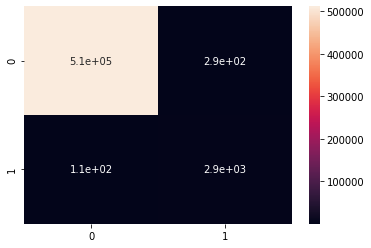

In [ ]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predicted))
sns.heatmap(cm, annot=True)

## **그래디언트 부스팅 회귀 트리에 가지치기**

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(x_test, y_test)))

훈련 세트 정확도: 0.930
테스트 세트 정확도: 0.874


**결측치 있는 열 제거시**

훈련 세트 정확도: 0.849

테스트 세트 정확도: 0.854

**결측치 0으로 채울시**

훈련 세트 정확도: 0.930

테스트 세트 정확도: 0.874

## **그래디언트 부스팅 회귀 트리에 learning_rate 기법**

In [ ]:
gbrt2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt2.fit(x_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt2.score(x_train, y_train)))
print("훈련 세트 정확도: {:.3f}".format(gbrt2.score(x_test, y_test)))

훈련 세트 정확도: 0.920
훈련 세트 정확도: 0.844


**결측치 있는 열 제거시**

훈련 세트 정확도: 0.882

훈련 세트 정확도: 0.892

**결측치 0으로 채울시**

훈련 세트 정확도: 0.920

훈련 세트 정확도: 0.844



# **RF로 2day만 예측**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df_sample[['avgTa', 'minTa', 'maxTa', 'mi10MaxRn', 'hr1MaxRn', 'sumRnDur', 'sumRn',
       'maxInsWs', 'maxWs', 'avgWs', 'minRhm', 'avgRhm', 'n99Rn', 'PRRCK_LARG',
       'PRRCK_MDDL', 'LOCTN_ALTT', 'LOCTN_GRDN', 'EIGHT_AGL', 'CLZN_CD',
       'TPGRP_TPCD', 'PRDN_FOM_C', 'SLANT_TYP', 'SLDPT_TPCD', 'SCSTX_CD',
       'SLTP_CD', 'STORUNST', 'FROR_CD', 'FRTP_CD', 'KOFTR_GROU', 'DMCLS_CD',
       'AGCLS_CD', 'HEIGHT']], 
    df_sample['2day_yn'], 
    test_size=0.25, 
    stratify=df_sample['2day_yn'], 
    random_state=123456)

In [ ]:
x_train

,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,stnId,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,HEIGHT,avgTa,minTa,maxTa,mi10MaxRn,hr1MaxRn,sumRnDur,sumRn,maxInsWs,maxWs,avgWs,minRhm,avgRhm,n99Rn
1582780,2.0,22.0,266.5,30.2,163.2,4.0,12.0,1.0,1.0,10.0,3.0,1.0,295,1.0,2.0,1.0,15.0,2.0,4.0,12.0,21.6,18.1,25.5,0.0,0.0,0.0,0.0,4.0,2.3,0.9,59.0,79.1,0.0
1494138,2.0,26.0,76.9,31.8,1.2,4.0,7.0,5.0,3.0,20.0,3.0,14.0,192,1.0,2.0,1.0,11.0,2.0,5.0,12.0,18.1,10.4,23.9,0.0,0.0,0.0,0.0,6.6,3.3,1.0,49.0,68.0,0.0
1708453,1.0,14.0,120.2,32.4,170.1,4.0,7.0,1.0,1.0,10.0,2.0,1.0,162,1.0,2.0,1.0,15.0,2.0,4.0,14.0,9.5,3.2,15.6,0.0,0.0,0.0,3.8,6.9,4.3,2.1,62.0,83.4,0.0
1979939,1.0,11.0,52.9,6.9,239.7,4.0,7.0,1.0,1.0,10.0,1.0,26.0,255,1.0,2.0,1.0,15.0,2.0,4.0,16.0,15.3,9.5,22.4,0.0,0.0,0.0,0.0,6.9,3.0,1.1,24.0,56.6,0.0
1408010,2.0,22.0,177.1,28.0,117.3,4.0,12.0,5.0,2.0,20.0,3.0,14.0,192,1.0,2.0,1.0,15.0,2.0,4.0,14.0,27.8,23.1,33.2,0.0,0.0,0.0,0.0,9.2,5.3,1.9,50.0,71.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431392,1.0,14.0,177.1,22.0,185.8,4.0,12.0,5.0,2.0,20.0,3.0,2.0,279,1.0,2.0,1.0,15.0,2.0,4.0,16.0,24.3,18.4,30.0,0.0,1.4,0.0,0.3,3.5,2.1,0.8,54.0,84.8,0.0
920037,1.0,11.0,187.2,15.6,339.8,2.0,2.0,1.0,1.0,1.0,1.0,1.0,136,1.0,2.0,1.0,11.0,1.0,5.0,10.0,6.1,-1.2,14.9,0.0,0.0,0.0,0.0,3.0,2.0,0.8,48.0,77.8,1.3
491932,2.0,24.0,69.3,36.8,236.3,3.0,7.0,5.0,2.0,20.0,2.0,14.0,281,1.0,2.0,2.0,31.0,2.0,4.0,16.0,8.2,1.3,15.6,0.0,0.0,0.0,1.0,11.1,6.1,3.8,23.0,53.4,0.0
1037237,3.0,31.0,883.8,22.7,80.3,2.0,12.0,1.0,1.0,20.0,2.0,1.0,271,1.0,2.0,2.0,34.0,2.0,4.0,14.0,1.1,-4.9,7.2,0.0,0.0,0.0,0.0,10.3,4.6,2.0,28.0,53.3,0.0


In [ ]:
# 검증 데이터나 테스트 데이터가 아닌 학습데이터에서만 오버샘플링 사용할 것
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE(random_state=0)
x_train,y_train = oversample.fit_resample(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=123456,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score

predicted = rf.predict(x_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 1.0
Mean accuracy score: 0.999


In [ ]:
predicted

array([0., 0., 0., ..., 0., 0., 0.])

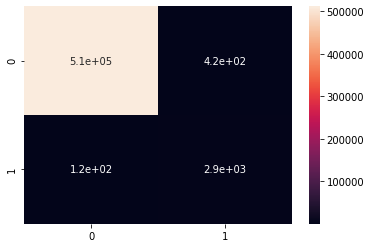

In [ ]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predicted))
sns.heatmap(cm, annot=True)

## **그래디언트 부스팅 회귀 트리에 가지치기**

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(x_test, y_test)))

훈련 세트 정확도: 0.921
테스트 세트 정확도: 0.915


## **그래디언트 부스팅 회귀 트리에 learning_rate 기법**

In [ ]:
gbrt2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt2.fit(x_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt2.score(x_train, y_train)))
print("훈련 세트 정확도: {:.3f}".format(gbrt2.score(x_test, y_test)))

훈련 세트 정확도: 0.917
훈련 세트 정확도: 0.910


#**RF로 1day만 예측 undersampling**

In [4]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [5]:
def metrics(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    print('정확도 : {0:.2f}, 정밀도 : {1:.2f}, 재현율 : {2:.2f}'.format(accuracy, precision, recall))
    print('f1-score : {0:.2f}, auc : {1:.2f}'.format(f1, roc_score))

In [6]:
raw_df = pd.read_csv("merge_final_real1.csv", encoding='utf-8-sig')

In [7]:
select_df = raw_df[['maxTa','minTa','avgTa','EIGHT_AGL','stnId','mi10MaxRn', 'hr1MaxRn', 'sumRnDur', 'sumRn', 'maxInsWs', 'maxWs', 'avgWs','minRhm','avgRhm','n99Rn', 'PRRCK_LARG', 'PRRCK_MDDL','LOCTN_ALTT','LOCTN_GRDN','CLZN_CD','TPGRP_TPCD','PRDN_FOM_C','SLDPT_TPCD','SLANT_TYP','SCSTX_CD','SLTP_CD','STORUNST','FROR_CD','FRTP_CD','KOFTR_GROU','DMCLS_CD','AGCLS_CD','HEIGHT','1day_yn']]
cleaned_df_1 = select_df.fillna(0)

In [8]:
y = cleaned_df_1['1day_yn']
X = cleaned_df_1.drop('1day_yn', axis =1)

In [9]:
from imblearn.under_sampling import RandomUnderSampler

# 1: 50 비율
X_samp, y_samp = RandomUnderSampler(random_state=1024, ratio={1: 359, 0: 17950}).fit_sample(X, y)
X_df = pd.DataFrame(X_samp)
y_df = pd.DataFrame(y_samp)

df_samp = pd.concat([X_df, y_df], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.25, shuffle=True, stratify=y_df, random_state=1024)

In [ ]:
gbrt = GradientBoostingClassifier(n_estimators=500, learning_rate = 0.1, max_depth = 4)
gbrt.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.997


In [ ]:
gbrt_pred = gbrt.predict(X_test)
metrics(y_test, gbrt_pred)

정확도 : 1.00, 정밀도 : 0.96, 재현율 : 0.86
f1-score : 0.91, auc : 0.93


In [11]:
gbrt = GradientBoostingClassifier()

gbrt_param_grid = {
    'n_estimators' : [100, 200, 300, 400, 500, 600],
    'learning_rate' : [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth' : [4, 6, 8, 10, 12],
}
# sklearn.metrics.SCORERS.keys()
gbrt_grid = GridSearchCV(gbrt, param_grid = gbrt_param_grid, scoring="roc_auc", n_jobs= 1, verbose = 1)
gbrt_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expe

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...
                 

In [13]:
print("최고 평균 auc : {0:.4f}".format(gbrt_grid.best_score_))
print("최고의 파라미터 : ", gbrt_grid.best_params_)
print("최고 점수를 낸 파라미터를 가진 모형 : ", gbrt_grid.best_estimator_)

최고 평균 auc : 0.9940
최고의 파라미터 :  {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500}
최고 점수를 낸 파라미터를 가진 모형 :  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [ ]:
gbrt = GradientBoostingClassifier(n_estimators=400, learning_rate = 0.1, max_depth = 8)
gbrt.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=400,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gbrt_pred = gbrt.predict(X_test)
metrics(y_test, gbrt_pred)

정확도 : 1.00, 정밀도 : 0.96, 재현율 : 0.84
f1-score : 0.90, auc : 0.92


In [14]:
gbrt_best = gbrt_grid.best_estimator_
# gbrt_best = GradientBoostingClassifier(n_estimators=500, learning_rate = 0.05, max_depth = 8)
gbrt_best.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [15]:
gbrt_best_pred = gbrt_best.predict(X_test)
metrics(y_test, gbrt_best_pred)

정확도 : 0.99, 정밀도 : 0.93, 재현율 : 0.78
f1-score : 0.85, auc : 0.89


In [16]:
import joblib

joblib.dump(gbrt_best, './gbrt_best_model_1day_yn.pkl')

['./gbrt_best_model_1day_yn.pkl']

In [ ]:
gbrt2 = GradientBoostingClassifier(n_estimators=500, learning_rate = 0.1, max_depth = 4)
gbrt2.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt2.score(X_train, y_train)))
print("훈련 세트 정확도: {:.3f}".format(gbrt2.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


훈련 세트 정확도: 1.000
훈련 세트 정확도: 0.997


In [ ]:
gbrt_pred2 = gbrt2.predict(X_test)
metrics(y_test, gbrt_pred2)

정확도 : 1.00, 정밀도 : 0.96, 재현율 : 0.86
f1-score : 0.91, auc : 0.93


#**RF로 2day만 예측 undersampling**

In [21]:
select_df1 = raw_df[['maxTa','minTa','avgTa','EIGHT_AGL','stnId','mi10MaxRn', 'hr1MaxRn', 'sumRnDur', 'sumRn', 'maxInsWs', 'maxWs', 'avgWs','minRhm','avgRhm','n99Rn', 'PRRCK_LARG', 'PRRCK_MDDL','LOCTN_ALTT','LOCTN_GRDN','CLZN_CD','TPGRP_TPCD','PRDN_FOM_C','SLDPT_TPCD','SLANT_TYP','SCSTX_CD','SLTP_CD','STORUNST','FROR_CD','FRTP_CD','KOFTR_GROU','DMCLS_CD','AGCLS_CD','HEIGHT','2day_yn']]
cleaned_df_2 = select_df1.fillna(0)

In [22]:
y = cleaned_df_2['2day_yn']
X = cleaned_df_2.drop('2day_yn', axis =1)

In [23]:
from imblearn.under_sampling import RandomUnderSampler

# 1: 50 비율
X_samp, y_samp = RandomUnderSampler(random_state=1024, ratio={1: 359, 0: 17950}).fit_sample(X, y)
X_df = pd.DataFrame(X_samp)
y_df = pd.DataFrame(y_samp)

df_samp = pd.concat([X_df, y_df], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.25, shuffle=True, stratify=y_df, random_state=1024)

In [25]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


훈련 세트 정확도: 0.980
테스트 세트 정확도: 0.980


In [ ]:
gbrt_pred = gbrt.predict(X_test)

In [ ]:
metrics(y_test, gbrt_pred)

정확도 : 0.98, 정밀도 : 0.00, 재현율 : 0.00
f1-score : 0.00, auc : 0.50


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
gbrt2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt2.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt2.score(X_train, y_train)))
print("훈련 세트 정확도: {:.3f}".format(gbrt2.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


훈련 세트 정확도: 0.980
훈련 세트 정확도: 0.980


In [27]:
gbrt = GradientBoostingClassifier()

gbrt_param_grid = {
    'n_estimators' : [100, 200, 300, 400, 500, 600],
    'learning_rate' : [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth' : [4, 6, 8, 10, 12],
}
# sklearn.metrics.SCORERS.keys()
gbrt_grid = GridSearchCV(gbrt, param_grid = gbrt_param_grid, scoring="roc_auc", n_jobs= 1, verbose = 1)
gbrt_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expe

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...
                 

In [32]:
print("최고 평균 auc : {0:.4f}".format(gbrt_grid.best_score_))
print("최고의 파라미터 : ", gbrt_grid.best_params_)
print("최고 점수를 낸 파라미터를 가진 모형 : ", gbrt_grid.best_estimator_)

최고 평균 auc : 0.9916
최고의 파라미터 :  {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 500}
최고 점수를 낸 파라미터를 가진 모형 :  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [33]:
gbrt_best = gbrt_grid.best_estimator_
# gbrt_best = GradientBoostingClassifier(n_estimators=500, learning_rate = 0.05, max_depth = 8)
gbrt_best.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [34]:
print("훈련 세트 정확도: {:.3f}".format(gbrt_best.score(X_train, y_train)))
print("훈련 세트 정확도: {:.3f}".format(gbrt_best.score(X_test, y_test)))

훈련 세트 정확도: 1.000
훈련 세트 정확도: 0.995


In [35]:
gbrt_best_pred = gbrt_best.predict(X_test)
metrics(y_test, gbrt_best_pred)

정확도 : 0.99, 정밀도 : 0.94, 재현율 : 0.80
f1-score : 0.86, auc : 0.90


In [36]:
import joblib

joblib.dump(gbrt_best, './gbrt_best_model_2day_yn.pkl')

['./gbrt_best_model_2day_yn.pkl']